![image](screen3.png)
![image](screen4.png)
![image](screen5.png)

Conviene calcolare dall'inizio la pulsazione di taglio data da: 1/sqrt(LC), il fattore di qualità Q = (1/R)*sqrt(L/C) e Delta_F = R/L

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Tiamat as tiam
from scipy.optimize import curve_fit
from scipy.stats import linregress

c:\Users\famig\Desktop\lab2\esame\lab2scripts\Tiamat.py:54: SyntaxWarning: invalid escape sequence '\m'
  """# Grafico con barre di errore


In [2]:
F = np.array([1500,1750,2000,2250,2500,2750,3000,3250,3500,3750,4000,4250,4500,4750,5000,5250,5500,5750,6000,6250,6500,6750,7000,7700]) # Frequenze
A = np.array([48,56,64,68,72,76,84,96,104,108,120,128,136,140,148,156,164,172,176,184,192,2000,208,232]) # Ampiezze (mV)

Slope: -0.0009075204378224479, Intercept: 3.074876649600832
Matrice di covarianza:
[[ 1.99432930e-09 -6.34559323e-07]
 [-6.34559323e-07  2.46299669e-02]]
Matrice di covarianza dei parametri del fit:
[[ 1.99432929e-09 -6.98015256e-06]
 [-6.98015256e-06  2.46299671e-02]]
Covarianza tra pendenza e intercetta: -6.980152561373545e-06
Pendenza (slope): -0.0009075204378224479 ± 4.4657914043602806e-05
Intercetta (intercept): 3.074876649600832 ± 0.15693937396023594
Pulsazione di taglio:  3388.2175226586105
Fattore di qualità:  1.537438324800416
incertezza sulla pulsazione di taglio:  229.09222406809732
Incertezza sul fattore di qualità:  0.07846968660641074


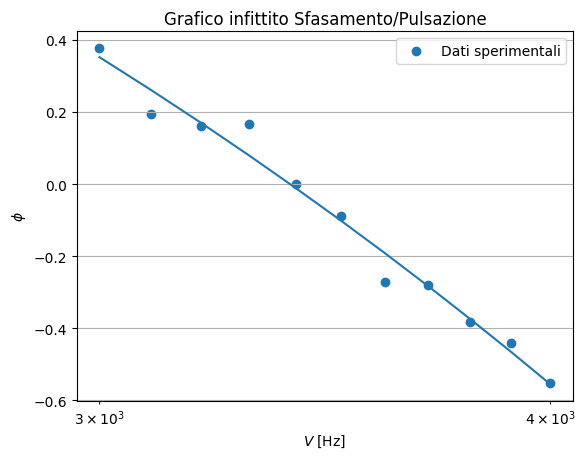

In [ ]:
#misure infittite dello sfasamento attorno lo zero fra 3000 e 4000 Hz
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Dati
DT_2 = np.array([20.0, 10.0, 8.0, 8.0, 0, -4.0, -12.0, -12.0, -16.0, -18.0, -22.0]) * (2 * np.pi) * (10 ** -6)
NU_4 = np.array([3000.0, 3100.0, 3200.0, 3300.0, 3400.0, 3500.0, 3600.0, 3700.0, 3800.0, 3900.0, 4000.0])
NU_inv2 = (DT_2 / (1 / NU_4))

slope,intercept,cov_matrix = tiam.fit_lineare(NU_4,NU_inv2)
plt.plot(NU_4,intercept+slope*NU_4)

# Stampa della matrice di covarianza e dei parametri
print(f"Matrice di covarianza dei parametri del fit:\n{pcov}")
print(f"Covarianza tra pendenza e intercetta: {pcov[0, 1]}")
print(f"Pendenza (slope): {slope} ± {slope_err}")
print(f"Intercetta (intercept): {intercept} ± {intercept_err}")

A = slope
B = intercept
Q = B/2             # Fattore di qualità
WO = -B/A           # PULSAZIONE di taglio

SWO = np.sqrt(1/A**2*cov_matrix[1][1] + B**2/A**4*cov_matrix[0][0]+2*(-1/A)*(B/A**2)*cov_matrix[0][1])
SQ = np.sqrt(cov_matrix[1,1]/4)

print("Pulsazione di taglio: ",WO)
print("Fattore di qualità: ",Q)

print("incertezza sulla pulsazione di taglio: ", SWO)
print("Incertezza sul fattore di qualità: ",SQ)
# Grafico
plt.scatter(NU_4, NU_inv2, label="Dati sperimentali")
plt.xscale('log')
plt.xlabel(r'$V$ [Hz]')
plt.ylabel(r'$\phi$')
plt.title('Grafico infittito Sfasamento/Pulsazione')


plt.grid()
plt.legend()
plt.savefig('SfasFitAnalisi', dpi=125)
plt.show()

[[ 3.86126935e-06 -1.23489536e-05  4.19074255e-06]
 [-1.23489536e-05  4.01996777e-05 -1.44685606e-05]
 [ 4.19074255e-06 -1.44685606e-05  7.19126404e-06]]


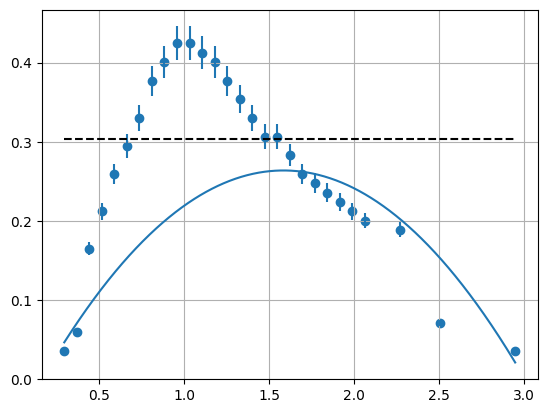

In [ ]:
NU_2 = np.array([1000.0, 1250.0, 1500.0, 1750.0, 2000.0, 2250.0, 2500.0, 2750.0, 3000.0, 3250.0, 3500.0, 3750.0, 4000.0, 4250.0, 4500.0, 4750.0, 5000.0, 5250.0, 5500.0, 5750.0, 6000.0, 6250.0, 6500.0, 6750.0, 7000.0, 7700.0, 8500.0, 10000.0])/3393.19
A_2 = np.array([240.0, 400.0, 1120.0, 1440.0, 1760.0, 2000.0, 2240.0, 2560.0, 2720.0, 2880.0, 2880.0, 2800.0, 2720.0, 2560.0, 2400.0, 2240.0, 2080.0, 2080.0, 1920.0, 1760.0, 1680.0, 1600.0, 1520.0, 1440.0, 1360.0, 1280.0, 480.0, 240.0])/(2*3393)

def func(x,a,b,c):
    return a*x**2 + b*x + c

err_A_2 = (A_2)/20
plt.errorbar(NU_2, A_2, xerr=0, yerr=err_A_2, fmt= 'none')

Xfit,Yfit,c,b,a,cov_matrix = tiam.fit_curve(NU_2,A_2,func,min(NU_2),max(NU_2),err_Y=err_A_2)

datix = np.linspace(min(NU_2),max(NU_2),100)
datiy = np.zeros(100)

for i in range(100):
    datiy[i] = 0.43/np.sqrt(2)

plt.plot(datix, datiy, 'k--') 
plt.plot(Xfit,Yfit)
plt.scatter(NU_2, A_2)
plt.grid()
plt.show()


#Da notare che ho fatto un fit parabolico inutile giusto per mostrare
#la irregolarità della curva considerata

[9.00107921e-04 6.31654682e-04 5.21115112e-04 4.26366910e-04
 3.47410075e-04 2.68453240e-04 2.05287772e-04 1.57913670e-04
 9.47482023e-05 3.15827341e-05 1.57913670e-05 1.57913670e-05
 7.89568352e-05 9.47482023e-05 1.10539569e-04 1.10539569e-04
 1.26330936e-04 1.26330936e-04 1.26330936e-04 1.26330936e-04]


<function matplotlib.pyplot.show(close=None, block=None)>

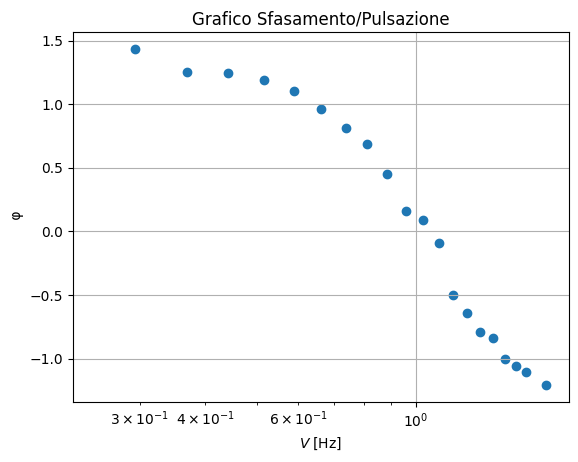

In [24]:
NU_3 = np.array([1000.0,  1250.0, 1500.0, 1750.0, 2000.0, 2250.0, 2500.0, 2750.0, 3000.0, 3250.0, 3500.0, 3750.0, 4000.0, 4250.0, 4500.0, 4750.0, 5000.0, 5250.0, 5500.0, 6000.0])
DT = np.array([228.0, 160.0, 132.0, 108.0, 88.0, 68.0, 52.0, 40.0, 24.0, 8.0, 4, -4.0, -20.0, -24.0, -28.0, -28.0, -32.0, -32.0, -32.0, -32.0])*(2*np.pi)*(10**(-6))#mus
NU_inv1 = (DT/(1/NU_3))

plt.scatter((NU_3)/(3393), NU_inv1)
plt.xscale('log')

err_NU_inv1= (np.abs(DT)/10)*2*np.pi

plt.errorbar((NU_3)/(3393), NU_inv1, xerr=0, yerr=err_NU_inv1, fmt='none')

plt.title('Grafico Sfasamento/Pulsazione')

plt.xlabel(r'$V$ [Hz]')
plt.ylabel(r' φ')
plt.grid()

print(err_NU_inv1)

plt.savefig('SfasAnalisi', dpi=125)
plt.show()

![image](screen6.png)
![image](screen7.png)

[[ 404.01089689 -833.45649824  421.07355314]
 [-833.45649824 1725.96293876 -875.44237865]
 [ 421.07355314 -875.44237865  445.99967642]]
-0.956610048627481 1.9677293636150814 -0.5886068634731435 [0.01886236 0.02004126 0.02122016 0.02122016 0.02063071 0.02004126
 0.01886236]
[[ 404.01089689 -833.45649824  421.07355314]
 [-833.45649824 1725.96293876 -875.44237865]
 [ 421.07355314 -875.44237865  445.99967642]]
--- Si ricorda che i seguenti valori potrebbero essere moltiplciati per 1/coso ----
Ampiezza massima:  0.4232889591738166
Pulsazione di taglio 1.0284908497659668
Fattore di qualità:  1.5461421904025052
incertezza su Am: 403.5110029005125
incertezza sulla frequenza di taglio: 1.7745812107252728
incertezza sul fattore di qualità: 111.77724852135078


<function matplotlib.pyplot.show(close=None, block=None)>

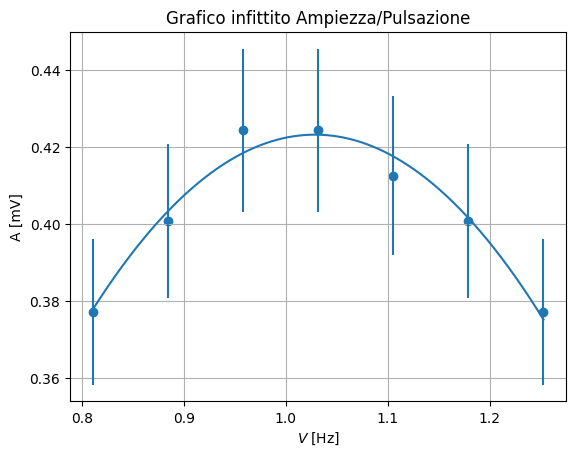

In [ ]:
NU_5 = np.array([2750.0, 3000.0, 3250.0, 3500.0, 3750.0, 4000.0, 4250.0])/3393.19
A_5 = np.array ([2560.0, 2720.0, 2880.0, 2880.0, 2800.0, 2720.0, 2560.0])
A_5 = A_5/(2*3393)

plt.scatter(NU_5, A_5)
plt.title('Grafico infittito Ampiezza/Pulsazione')
plt.xlabel(r'$V$ [Hz]')
plt.ylabel(r'A [mV]')
plt.grid()

err_A_5= (A_5/20)

def func(x, c, b, a):
    return c*(x*x) + b*x + a

Xfit,Yfit,c,b,a,cov_matrix = tiam.fit_curve(NU_5,A_5,func,min(NU_5),max(NU_5))
print(c,b,a,err_A_5)
print(cov_matrix)

AM = (4*a*c-b**2)/(4*c)                 #Ampiezza massima
WO = -b/(2*c)                           #pulsazione di taglio
Q = b/(np.sqrt(b**2-4*a*c))

print("--- Si ricorda che i seguenti valori potrebbero essere moltiplciati per 1/coso ----")
print("Ampiezza massima: ",AM)
print("Pulsazione di taglio",WO)
print("Fattore di qualità: ",Q)

S_AM = np.sqrt(cov_matrix[0][0]**2 + (b**2)/(4*(c**2))*cov_matrix[1][1] + (b**4/(16*(c**4)))*cov_matrix[2,2] - (b/c)*cov_matrix[0][1] + (b**2/(2*(c**2)))*cov_matrix[0][2] - (b**3)/(4*c**3)*cov_matrix[1][2])
S_WO = np.sqrt((b**2)/(4*c**4)*cov_matrix[2][2] + (1/(4*c**2))*cov_matrix[1][1]-b/(2*c**3)*cov_matrix[1][2])
S_Q = np.sqrt(1/(b**2-4*a*c)**3*(2*b**2*a**2*cov_matrix[2][2]+8*a**2*c**2*cov_matrix[1][1]+2*b**2*c**2*cov_matrix[0][0] + 4*c*b**2*a*cov_matrix[0][2]-8*c*b*a**2*cov_matrix[1][2]-8*c**2*b*a*cov_matrix[0][1]))


print("incertezza su Am:",S_AM)
print("incertezza sulla frequenza di taglio:",S_WO)
print("incertezza sul fattore di qualità:",S_Q)

plt.errorbar(NU_5, A_5, xerr=0, yerr=err_A_5, fmt= 'none')

plt.plot(Xfit,Yfit)

plt.savefig('CampFitAnalisi', dpi=125)
plt.show

[] []


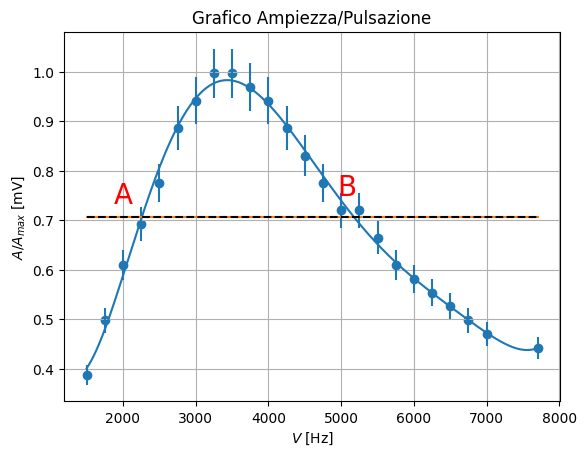

In [31]:
A_2 = np.array([1120.0, 1440.0, 1760.0, 2000.0, 2240.0, 2560.0, 2720.0, 2880.0, 2880.0, 2800.0, 2720.0, 2560.0, 2400.0, 2240.0, 2080.0, 2080.0, 1920.0, 1760.0, 1680.0, 1600.0, 1520.0, 1440.0, 1360.0, 1280.0])/(2)/(1445.11)
NU_2 = np.array([1500.0, 1750.0, 2000.0, 2250.0, 2500.0, 2750.0, 3000.0, 3250.0, 3500.0, 3750.0, 4000.0, 4250.0, 4500.0, 4750.0, 5000.0, 5250.0, 5500.0, 5750.0, 6000.0, 6250.0, 6500.0, 6750.0, 7000.0, 7700.0])

err_A_2 = (A_2)/20

indice_punto = 4
plt.annotate(
    'A',
    (NU_2[3], A_2[3]), 
    textcoords="offset points",
    fontsize=20,  
    xytext=(-20, 15),
    color='red'  
)

indice_punto = 15
plt.annotate(
    'B',
    (NU_2[15], A_2[15]), 
    textcoords="offset points",
    fontsize=20,  
    xytext=(-16, 11),
    color='red'  
)
    

plt.errorbar(NU_2, A_2, xerr=0, yerr=err_A_2, fmt= 'none')

datix = np.linspace(1500, 7700, 100)
datiy = np.zeros(100)

for i in range(100):
    datiy[i] = 1/np.sqrt(2)

Xfit,Yfit = tiam.fit_polinomiale(NU_2,A_2,6)
valori,differenze = tiam.find_roots(NU_2,A_2,datix,datiy,min(NU_2),max(NU_2))
print(valori,differenze)

plt.plot(datix, datiy, 'k--') 
plt.scatter((NU_2), A_2)
plt.title('Grafico Ampiezza/Pulsazione')
plt.xlabel(r'$V$ [Hz]')
plt.ylabel(r'$A/A_{max}$ [mV]')
plt.grid()

plt.savefig('CampConclusioni', dpi=125)
plt.show()